# Ejercicio de reduccion y optimizacion de dimensiones

Importado de las librerias necesarias para Python

In [245]:
# Importar las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
from sklearn.datasets import load_digits, load_iris, load_wine

## Seleccion de los dataset

### Dataset de digitos

Instancia del dataset y su division en variables dependiente e indepentiente

In [246]:
data_digits = load_digits()
df_digits = pd.DataFrame(data_digits.data, columns=data_digits.feature_names)
x_digits = data_digits.data
y_digits = data_digits.target

df_digits.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Dataset de iris

Instancia del dataset y su division en variables dependiente e indepentiente

In [247]:
data_iris = load_iris()
df_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
x_iris = data_iris.data
y_iris = data_iris.target

df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Dataset de wine

Instancia del dataset y su division en variables dependiente e indepentiente

In [248]:
data_wine = load_wine()
df_wine = pd.DataFrame(data_wine.data, columns=data_wine.feature_names)
x_wine = data_wine.data
y_wine = data_wine.target

df_wine.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Funciones de utilidad

Declaracion de la funcion `create_pc_data` la cual permite instanciar el PCA y ejecutarlo sobre un conjunto de datos

In [249]:
def create_pca_data(values_data: np.ndarray, n_components: int) -> np.ndarray:
    pca = PCA(n_components=n_components)
    data = pca.fit_transform(values_data)
    return pca.inverse_transform(data)

Declaracion de la funcion `create_nmf_data` la cual permite instaciar el algoritmo NMF y ejectuarlo sobre un conjunto de datos

In [250]:
def create_nmf_data(values_data: np.ndarray, n_components: int) -> np.ndarray:
    nmf = NMF(n_components=n_components)
    data = nmf.fit_transform(values_data)
    return np.dot(data, nmf.components_)

Declaracion de las funciones`display_figure` y `display_img_figure` que permiten imprimir un grafico de dispersion tomando en cuenta un conjunto de datos tranformado por el algoritmo PCA con metadatos

In [251]:
def display_figure(data_pca: np.ndarray, target: np.ndarray, title: str, xlabel: str, ylabel: str, colorbar_label: str) -> None:
    plt.figure(figsize=(10, 5))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar(label=colorbar_label)
    plt.show()

In [252]:
def display_img_figure(data_pca: np.ndarray, title: str) -> None:
    plt.figure(figsize=(10, 5))
    plt.imshow(data_pca[0].reshape(8, 8), cmap='gray')
    plt.title(title)
    plt.show()

Cantidad de componentes sobre los cuales ejectuar los algoritmos de reduccion de dimensionalidad

In [253]:
n_components = [1, 2, 3, 4]

## Reduccion de dimensionalidad en PCA

### Dataset load_digits

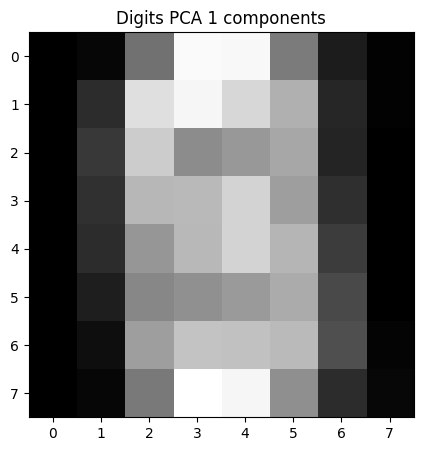

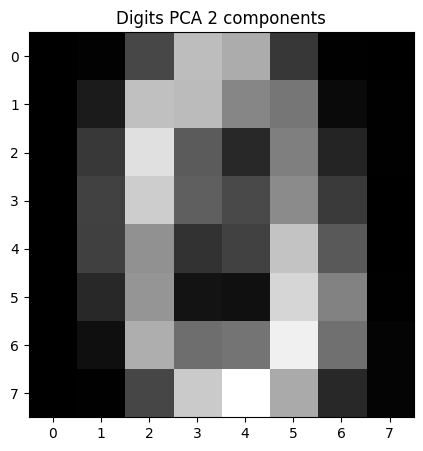

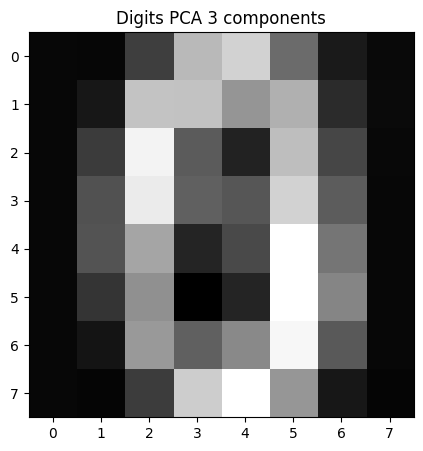

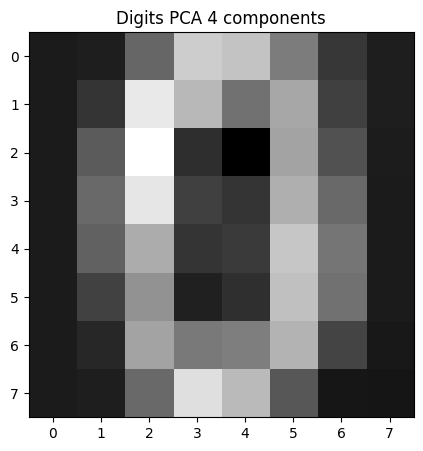

In [254]:
for component in n_components:
    data_pca_digits = create_pca_data(x_digits, component)
    display_img_figure(data_pca_digits, f'Digits PCA {component} components')

### Dataset load_iris

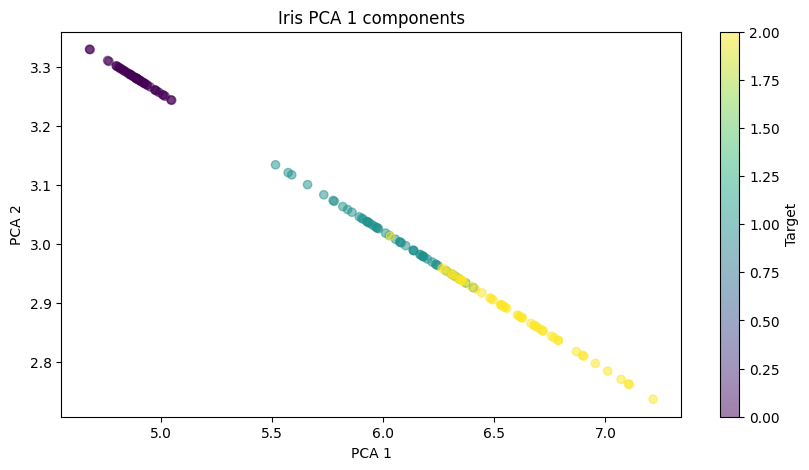

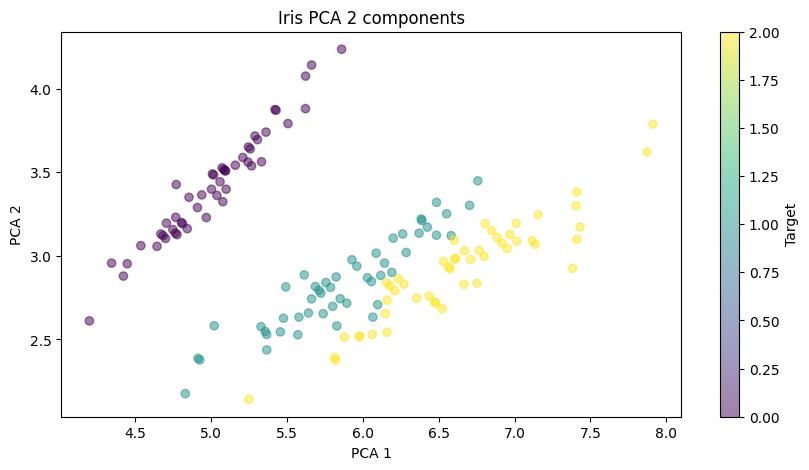

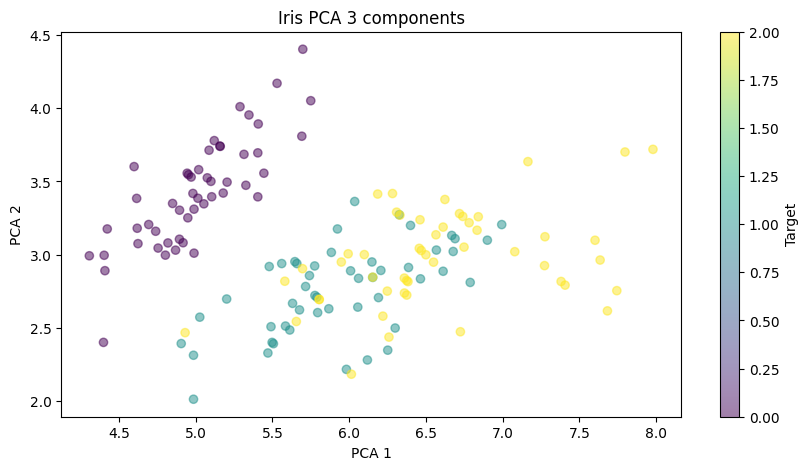

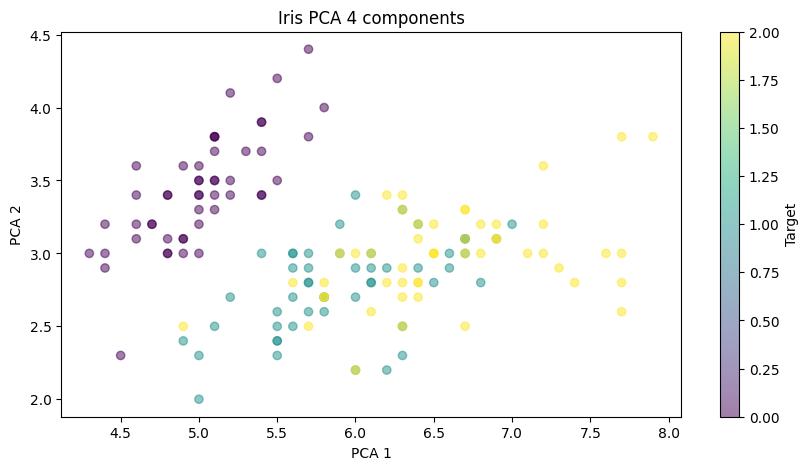

In [255]:
for component in n_components:
    data_pca_iris = create_pca_data(x_iris, component)
    display_figure(data_pca_iris, y_iris, f'Iris PCA {component} components', 'PCA 1', 'PCA 2', 'Target')

### Dataset load_wine

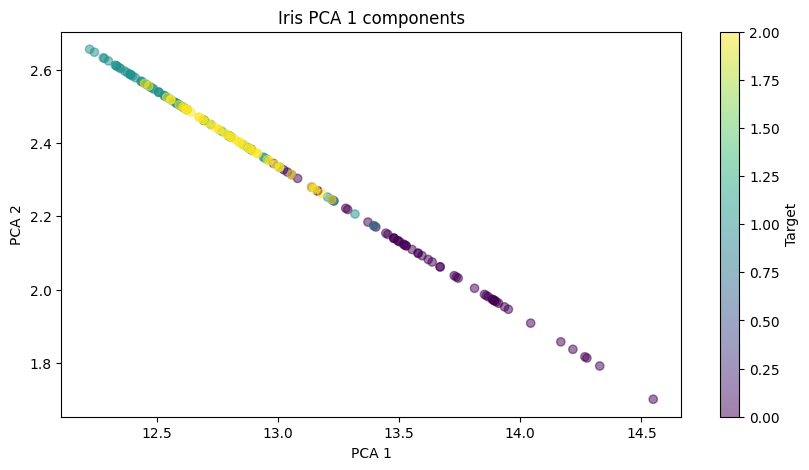

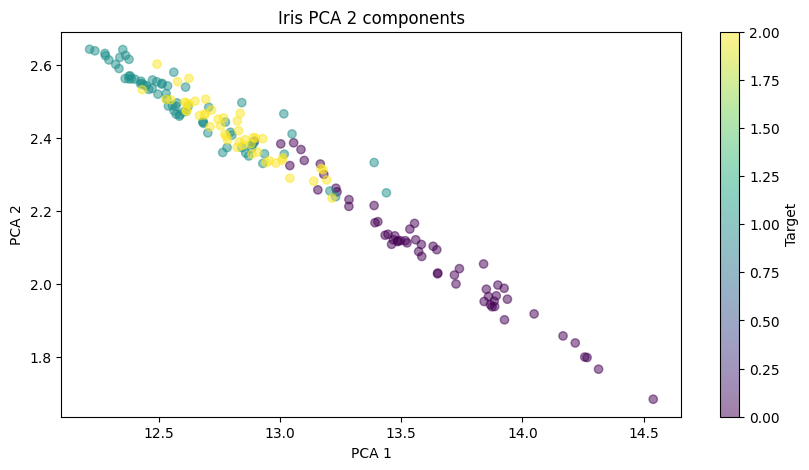

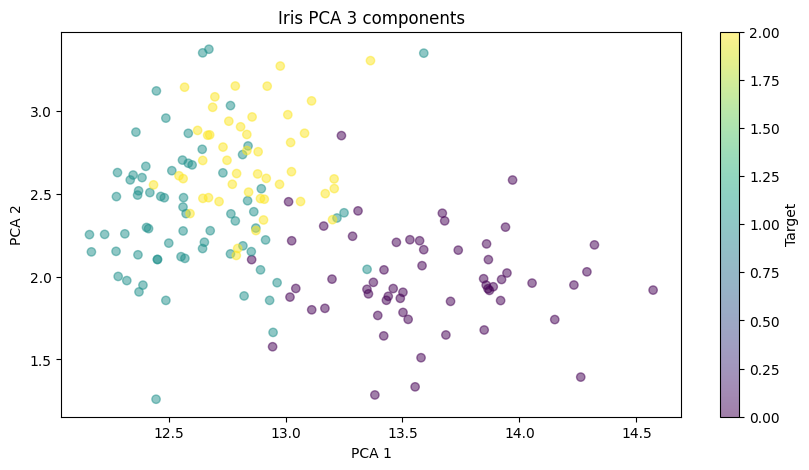

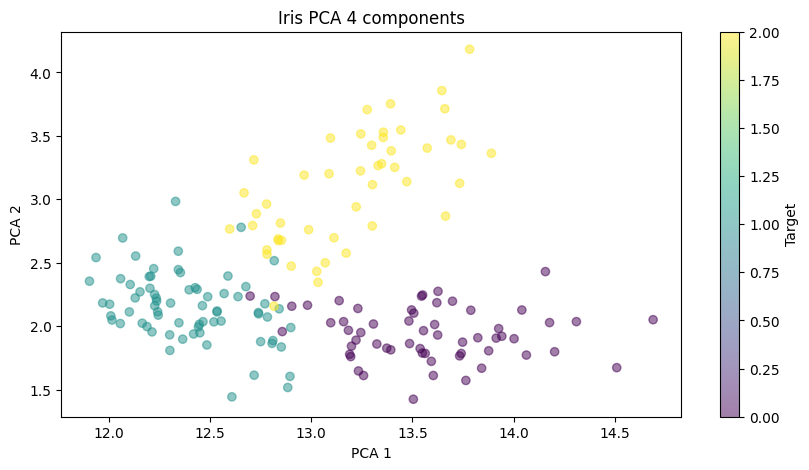

In [256]:
for component in n_components:
    data_pca_wine = create_pca_data(x_wine, component)
    display_figure(data_pca_wine, y_wine, f'Iris PCA {component} components', 'PCA 1', 'PCA 2', 'Target')

## Reduccion de dimensionalidad en NMF

### Dataset load_digits

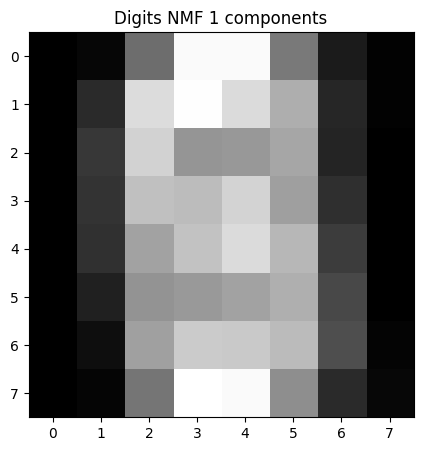

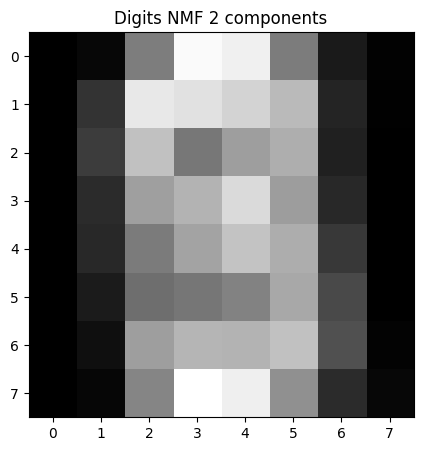

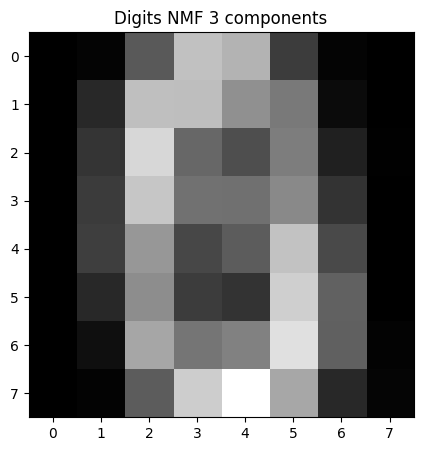

/Users/alemr/Developer/courses/Samsung-Innovation-Campus/.venv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


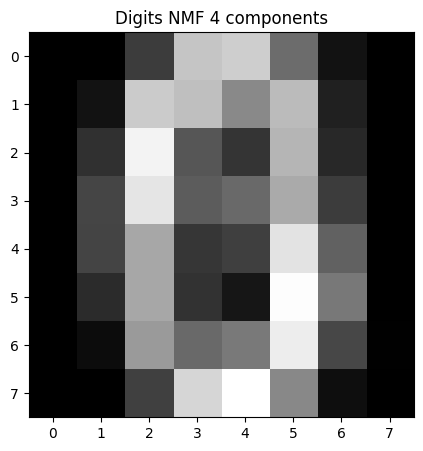

In [257]:
for component in n_components:
    data_nmf_digits = create_nmf_data(x_digits, component)
    display_img_figure(data_nmf_digits, f'Digits NMF {component} components')

### Dataset load_iris

/Users/alemr/Developer/courses/Samsung-Innovation-Campus/.venv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


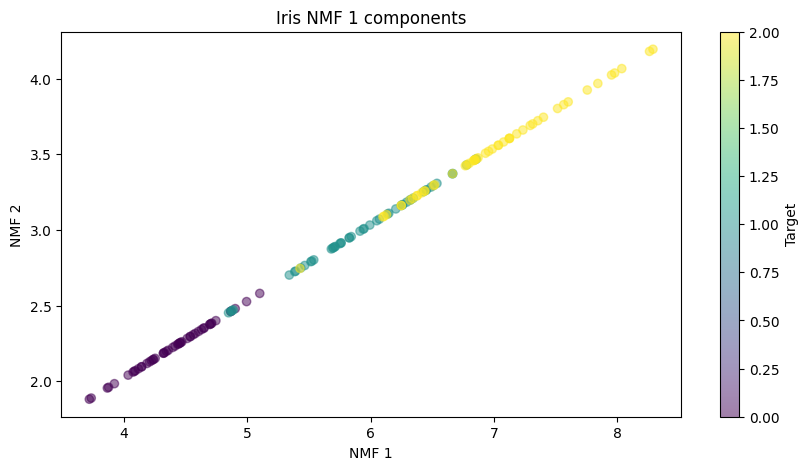

/Users/alemr/Developer/courses/Samsung-Innovation-Campus/.venv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


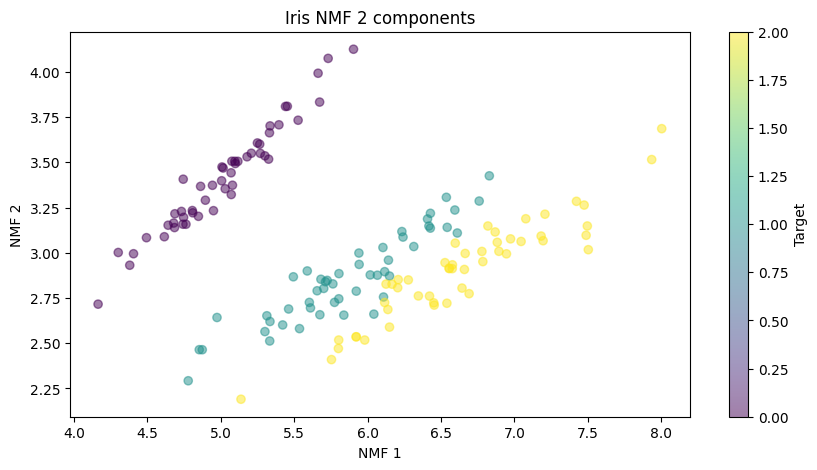

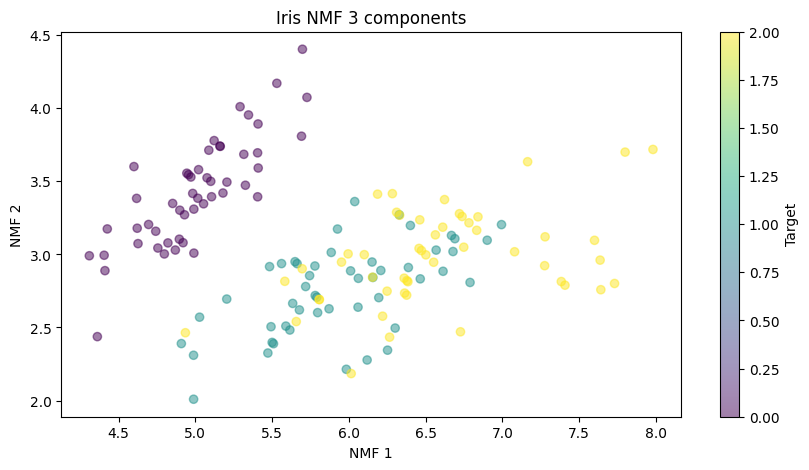

/Users/alemr/Developer/courses/Samsung-Innovation-Campus/.venv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


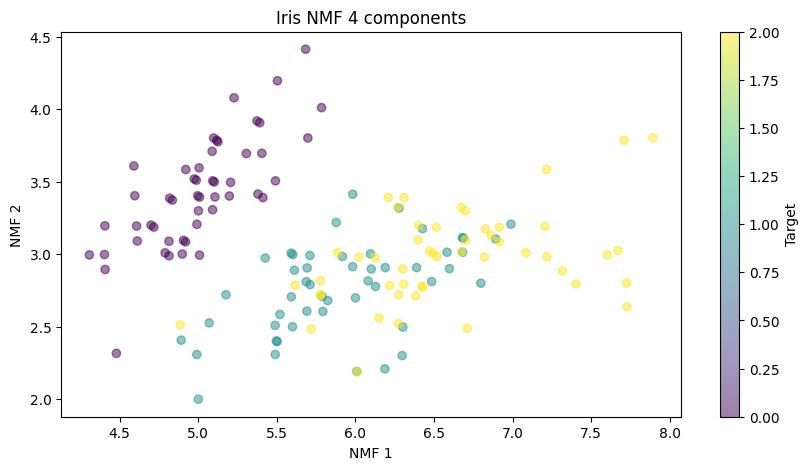

In [258]:
for component in n_components:
    data_nmf_iris = create_nmf_data(x_iris, component)
    display_figure(data_nmf_iris, y_iris, f'Iris NMF {component} components', 'NMF 1', 'NMF 2', 'Target')

### Dataset load_wine

/Users/alemr/Developer/courses/Samsung-Innovation-Campus/.venv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


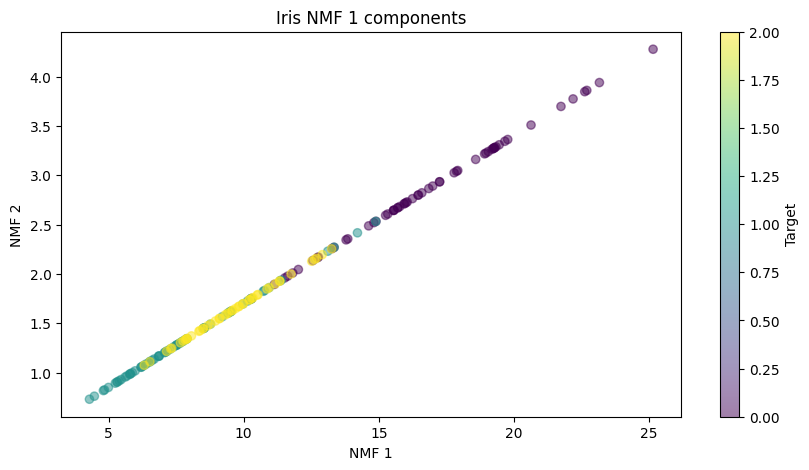

/Users/alemr/Developer/courses/Samsung-Innovation-Campus/.venv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


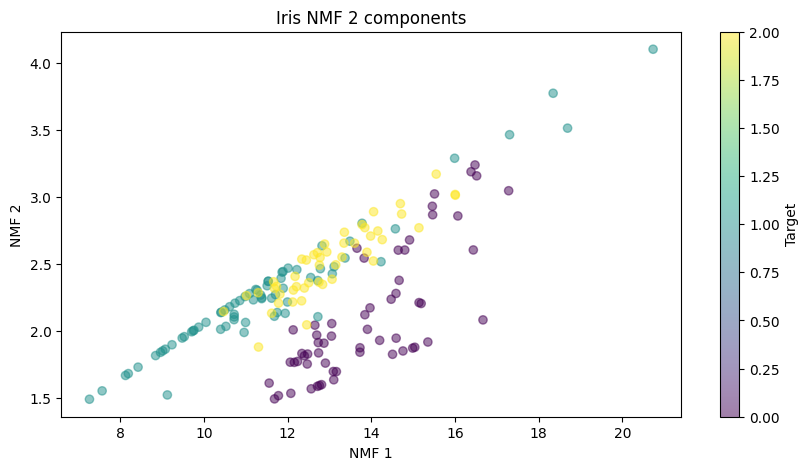

/Users/alemr/Developer/courses/Samsung-Innovation-Campus/.venv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


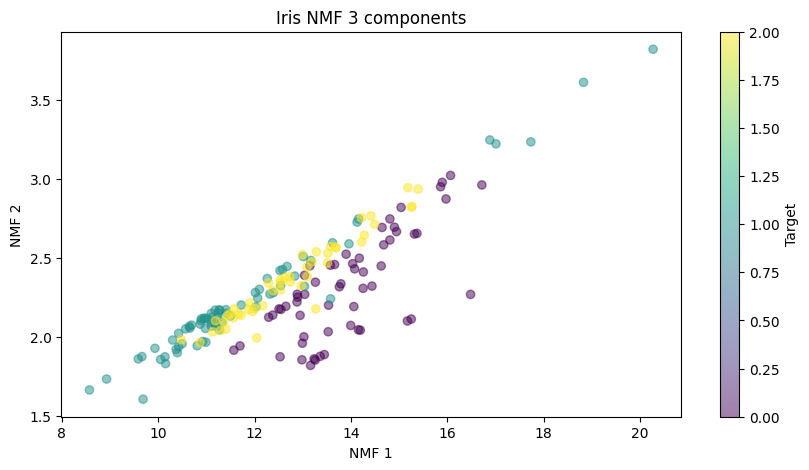

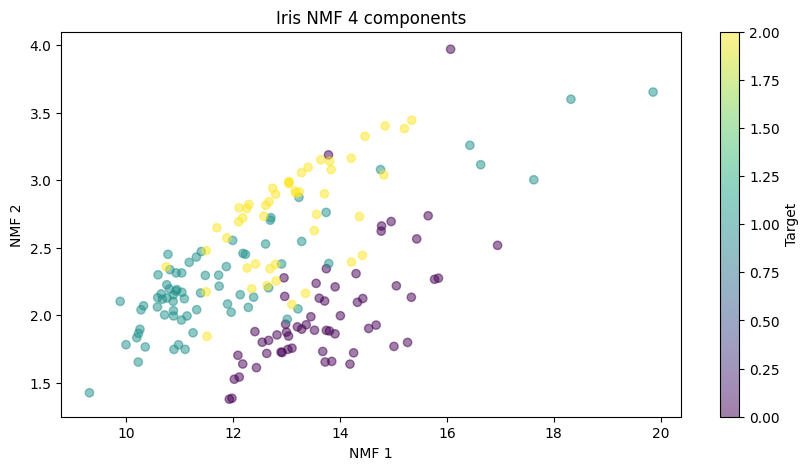

In [259]:
for component in n_components:
    data_nmf_wine = create_nmf_data(x_wine, component)
    display_figure(data_nmf_wine, y_wine, f'Iris NMF {component} components', 'NMF 1', 'NMF 2', 'Target')